In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

for column in X.columns:
    X[column] = pd.to_numeric(X[column])
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=220, max_depth=7, random_state=seed).fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.876788578470907
Average Precision: 0.8337224543720853
Accuracy: 0.7988295537673739


In [3]:
import importlib
import medical_explainer
importlib.reload(medical_explainer)

/home/llja/anaconda3/envs/medical/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'medical_explainer' from '/home/llja/repos/medical_explainer/medical_explainer.py'>

| Step 1  ==> Calibrating model


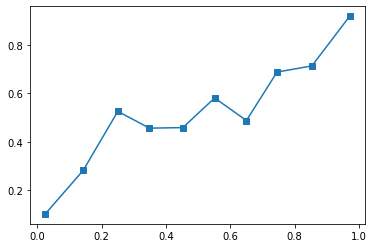

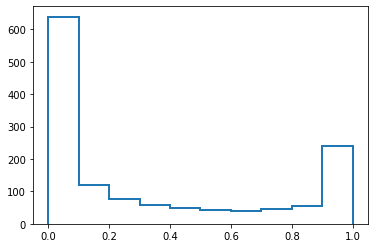

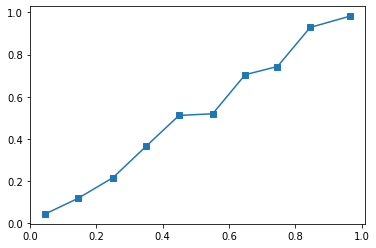

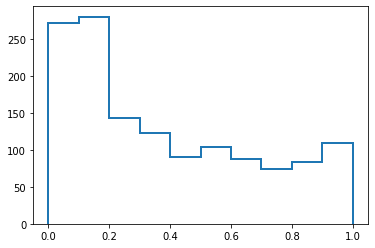

ROC AUC: 0.876788578470907
Average Precision: 0.8337224543720853
Accuracy: 0.7988295537673739
ROC AUC: 0.8820897483530126
Average Precision: 0.8445515519385619
Accuracy: 0.8024871982443307

| Step 2 ==> Calculate SHAP values

| Step 3 ==> Fit clinical score calculator
Novel fitting


Probability threshold: 0.1
Score threshold: 30.0

Probability threshold: 0.5
Score threshold: 51.0

Probability threshold: 0.9
Score threshold: 71.0



In [4]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)

explainer.fit(10, shap_method='tree', method='novel')

# explainer.plot_calibration_original()
# explainer.calibrate()
# explainer.plot_calibration_calibrated()

In [5]:
explainer.score_array_list

[array([14., -9.]),
 array([-5.,  6.]),
 array([-4.,  7.]),
 array([-4.,  7.]),
 array([-5.,  3.]),
 array([ 7., -2.,  5.]),
 array([-3.,  2.]),
 array([-3.,  2.]),
 array([ 3., -2.]),
 array([ 1., -1.,  8.])]

In [6]:
explainer.breakpoints_list

[[-0.3222222222222222, 8.566998804258343, 294.66041666666666],
 [11.6, 15.460002265270635, 30.5],
 [0.008, 5.313735031154231, 153.928],
 [18.258726899383984, 75.68001859329284, 90.0],
 [0.0, 0.963835268962509, 3.0],
 [0.0, 384.7960179943883, 1065.9919969974367, 1773.0],
 [38.0, 305.3387911021671, 23111.0],
 [0.2, 3.472814607616721, 17.3],
 [0.0, 2.7366613748011286, 5.2],
 [0.0, 0.44799972921009656, 1.1229212692165025, 5.0]]

In [7]:
explainer.scoring_table

,Score,Probability
0,0.0,0.004504
1,1.0,0.005002
2,2.0,0.005556
3,3.0,0.006171
4,4.0,0.006853
...,...,...
93,93.0,0.988054
94,94.0,0.989237
95,95.0,0.990305
96,96.0,0.991267


In [8]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))

ROC AUC: 0.7546339927324133
Average Precision: 0.6646323742868273
Accuracy: 0.709583028529627
[[772  72]
 [325 198]]
